<a href="https://colab.research.google.com/github/mohanaditya910/eip-season4-batch1/blob/master/week2/max_12k_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#image standardization........
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#image normalization................
X_train=(X_train-np.mean(X_train))/np.std(X_train)
X_test=(X_test-np.mean(X_test))/np.std(X_test)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#praying to the heavenly gods........................
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Activation
from keras.optimizers import Adam

In [0]:
def skeleton(input_shape,num_classes,n_c_factor_3,n_c_1,layers_in_block):

  model=Sequential()
  for i in range(layers_in_block):
    if i==0:
      model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,input_shape=(28,28,1),activation='relu',use_bias=False))
      model.add(BatchNormalization())
    else:
      model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,activation='relu',use_bias=False))
      model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=n_c_1,kernel_size=1,activation='relu',use_bias=False))
  model.add(BatchNormalization())

  for i in range(layers_in_block):
    model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,activation='relu',use_bias=False))
    model.add(BatchNormalization())

  #no maxpooling
  model.add(Conv2D(filters=num_classes,kernel_size=1,activation='relu',use_bias=False))
  #activation is avoided.
  model.add(Conv2D(filters=num_classes,kernel_size=3,use_bias=False))
  model.add(Conv2D(filters=num_classes,kernel_size=3,use_bias=False))
  ##

  model.add(Flatten())
  model.add(Activation('softmax'))

  return model

In [22]:
input_shape=(28,28,1)
num_classes=10
layers_in_block=3


n_c_factor_3=8
n_c_1=8
opt=Adam(lr=0.003)


model=skeleton(input_shape,num_classes,n_c_factor_3,n_c_1,layers_in_block)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
  

  

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_18 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 22, 22, 24)        3456      
_________________________________________________________________
batch_normalization_20 (Batc (None, 22, 22, 24)        96        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 24)       

In [23]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 37s 615us/step - loss: 0.1688 - acc: 0.9456 - val_loss: 0.1186 - val_acc: 0.9654
Epoch 2/20
60000/60000 [==============================] - 35s 577us/step - loss: 0.0710 - acc: 0.9785 - val_loss: 0.0566 - val_acc: 0.9825
Epoch 3/20
60000/60000 [==============================] - 36s 594us/step - loss: 0.0575 - acc: 0.9825 - val_loss: 0.0494 - val_acc: 0.9845
Epoch 4/20
60000/60000 [==============================] - 37s 618us/step - loss: 0.0495 - acc: 0.9842 - val_loss: 0.0482 - val_acc: 0.9855
Epoch 5/20
60000/60000 [==============================] - 36s 602us/step - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0398 - val_acc: 0.9872
Epoch 6/20
60000/60000 [==============================] - 36s 594us/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0420 - val_acc: 0.9873
Epoch 7/20
60000/60000 [==============================] - 36s 595us/step - loss: 0.0361 - acc: 0.9887 - val_loss: 0.

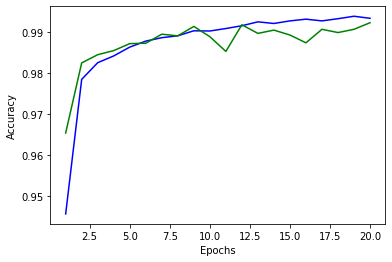

In [24]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Train_acc')
plt.plot(epochs,val_acc,'g',label='Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [25]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 128us/step


[0.025943285627150908, 0.9923]

model hit 99.23 val_accuracy...will try by checking out with dropout....

model inspiration from VGG blocks...